# Exam 1
Due October 5

Name: William Jardee

In [1]:
import os
import numpy as np
from glob import glob
import astropy.units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from scipy.optimize import curve_fit
from uncertainties import ufloat
from IPython.display import display, Markdown
%matplotlib inline
# matplotlib.use('nbagg')

In [2]:
def primt(*args):
    '''
    For any amount of arguments "*args", prints in magenta.
    '''
    magenta = "\x1B[38;5;201m"   # the color in ANSI code
    string = ""
    for el in args:  # for each argument
        string += " "+(str(el))  # add the argument to the string to be printed
    magenta += string[1:]
    print(magenta)   #print!

## 1) Numpy operations:

In [3]:
# Create a fake image with a single star
npix = 51
x = np.arange(npix).astype(float)-npix/2
xx = np.repeat(x,npix).reshape(npix,npix).T
yy = np.repeat(x,npix).reshape(npix,npix)
im = np.random.randn(npix,npix)*2
im += 50*np.exp(-0.5*(xx**2+yy**2)/5.0**2)

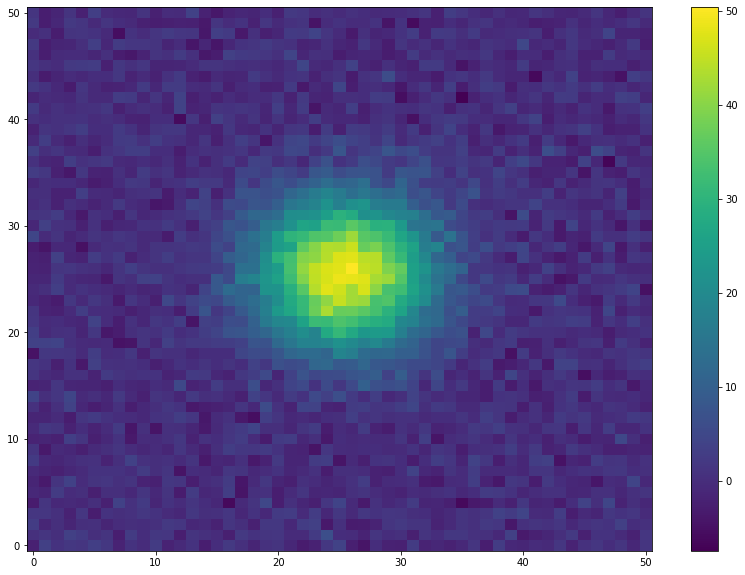

In [4]:
plt.figure(figsize=(14, 10))
plt.imshow(im,aspect='auto',origin='lower')
plt.colorbar()
plt.show()

a) Sum up the total flux in the image.

b) Perform a sum across the X-axis (all of the columns).  Plot the result.

c) Add a value of 20.0 to the image.

d) Take the square root of the image.

Total flux: 7728.61


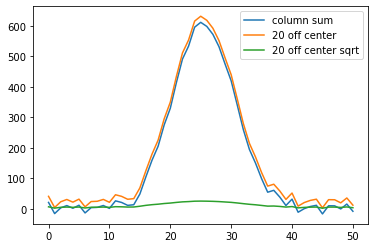

In [5]:
primt(f"Total flux: {np.sum(im):.2f}")

# plotting column sums
xlin = np.arange(im.shape[0])
col = im.sum(axis=0)
plt.plot(xlin, col, label = "column sum")


col20 = col + 20
plt.plot(xlin, col20, label = "20 off center")
im20sqrt = np.sqrt(col20)
plt.plot(xlin, im20sqrt, label = "20 off center sqrt")
plt.legend()
plt.show()

## 2) Writing functions:

Write a function called sumsq() that takes an input *list* of numbers and returns the sum of the squares of these numbers.  Use a FOR loop.

Run it on ``a=[10.0, 30.0, 1.0, -1.0, 44.5]``.

In [6]:
def sumsq(lis):
    run_total = 0
    for i in lis:
        run_total += i**2
    return run_total

a=[10.0, 30.0, 1.0, -1.0, 44.5]
primt(sumsq(a))

2982.25


## 3) Polynomial fitting:



In [7]:
# Fit a polynomial to these X, Y, Yerr values
x = np.arange(20)
y = np.array([0.89660,  0.22224, -0.61563, -0.38374, -0.11450,  0.37926,  1.39436,  2.09292,  3.31577, 3.39157,
              4.35307,  4.76022,  4.74279,  3.42970,  2.50369,  0.72354, -0.52408, -1.24305, -1.35808,  0.97178])
yerr = np.array([0.495, 0.391, 0.382, 0.446, 0.322, 0.393, 0.390, 0.438, 0.362, 0.416,
                 0.367, 0.400, 0.373, 0.291, 0.468, 0.179, 0.443, 0.465, 0.335, 0.344])

What order do you need to get a good fit?

What is the final reduced chi-squared value?

χred sq: 0.44 Dof: 14
a = (1.500+/-0.164)e-04
b = (-5.543+/-0.793)e-03
c = (5.576+/-1.374)e-02
d = (-0.547+/-1.024)e-01



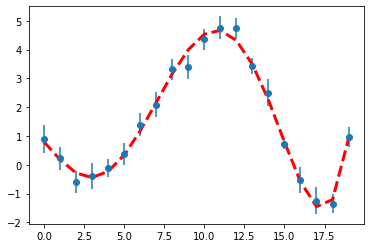

In [8]:
plt.errorbar(x, y, yerr = yerr, fmt = 'o')

alph=[]
for i in range(97,123):
    alph.append(chr(i))

def deg_fit(deg):
    (param,cov) = np.polyfit(x,y,deg+1,w=1/yerr,cov=True)
    fitp = np.poly1d(param)
    yfit = fitp(x)
    plt.plot(x, yfit,'r--',lw=3)
    chi = np.sum(((y - yfit)/yerr)**2)
    
    dof = len(y) - len(param)
    redchi = chi/dof
    primt(f"χred sq: {redchi:.2f} Dof: {dof}")
    for i in range(deg):
        a = ufloat(param[i],np.sqrt(cov[i,i]))
        primt(f"{alph[i]} = {a:.3e}")
    print()

deg_fit(4)
plt.show()

# it seems that the lowest degree, best fit is a fourth power. χ of a cubic is 2.82, but drops to 0.44 for a 4th power.

## 4) Astropy units:

Calculate the (circular) orbital speed (in km/s) of the Moon around the Earth using astropy units and constants, and the equation:

$$v = \sqrt{\frac{G M_{earth}}{r_{moon}}}$$

The Earth-Moon distance is 384,400 km.

In [9]:
from astropy.constants import G, M_earth
r_moon = 384400*u.km

v = np.sqrt(G*M_earth/r_moon).to(u.km/u.s)
primt(f"{v:.3f}")

1.018 km / s


## 5) sky coords
Generate astropy SkyCoords for ra=15.0 deg, dec=+30.0 deg and ra=250.0 deg, dec=-21.0 deg.

a) Print out their equatorial coordinates in hours, minutes, seconds for RA and deg, arcminutes and arcseconds for DEC.

b) What are the galactic coordinates for these two positions?

c) Measure the separation between these two positions.
 

In [10]:
c1 = SkyCoord(ra=15*u.degree, dec=30*u.degree, frame='icrs')
c2 = SkyCoord(ra=250*u.degree, dec=-21*u.degree, frame='icrs')


primt("equatorial: \n" +
      " "*4 + c1.transform_to('fk5').to_string('hmsdms') + "\n" +
      " "*4 + c2.transform_to('fk5').to_string('hmsdms') + "\n") # make sure to get this into equatorial

primt("galactic: \n" +
      " "*4 + c1.transform_to('galactic').to_string('hmsdms') + "\n" + 
      " "*4 + c2.transform_to('galactic').to_string('hmsdms') + "\n") # make sure to get this into galactic

primt("separation: \n" + 
      " "*4 + c1.separation(c2).to_string())

equatorial: 
    01h00m00.0024s +30d00m00.0036s
    16h40m00.0019s -20d59m59.9844s

galactic: 
    08h20m33.1635s -32d50m06.24s
    23h51m34.1614s +16d42m09.9719s

separation: 
    130d00m36.4653s


## 6) astropy wcs

a) Generate an astropy WCS object with a tangent plane projection, 1001x1001 pixels, central pixel at RA=92.3 deg, DEC=-75.5 deg, a pixel scale of 0.5 arcsec/pixel (use `cdelt`), and a rotation of 5 degrees (use `pc`). 

b) Create a fake 1001x1001 image (either all zeros or random numbers) and display the image using as projection your new wcs object. Overplot the grid with `plt.grid(color='white', ls='solid')`. Make sure that the image and coordinates look as expected.

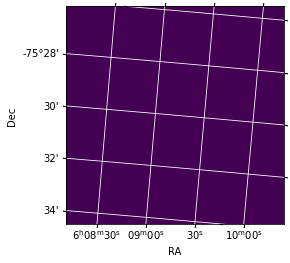

In [11]:
rot_mat = lambda ang: [[np.cos(ang),-np.sin(ang)],[np.sin(ang), np.cos(ang)]]

# Make a basic WCS object
w4 = WCS(naxis=2)
w4.wcs.ctype=['RA---TAN', 'DEC--TAN']
w4.wcs.crpix = [1001/2]*2
w4.pixel_shape = [1001]*2
w4.wcs.cdelt = [(0.5 / 3600)]*2
w4.wcs.pc = rot_mat(5*u.deg)
w4.wcs.crval = [92.3,-75.5]

# Flat image to rotate
ones = np.zeros([1001,1001])

# Display the image with world coordinates
fig = plt.figure()
fig.add_subplot(111, projection=w4)
plt.imshow(ones, origin='lower',cmap=plt.cm.viridis)
plt.grid(color='white', ls='solid')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

## 7) Blackbody radiation:

What is the peak wavelength (in Angstroms or microns) for a blackbody at the temperature of

(a) the sun (5778K),

(b) a cool M star (3000K),

(c) a giant planet (300K), and

(d) cold dust (30K)?

$\lambda_{max} = \frac{2.8979 mm K}{T}$

In [12]:
const = 2.8979 * u.mm *u.K 
def wavelen(name, temp):
    wave = const /(temp*u.K)
    primt(name + ": \n" +
          " "*4 + f"{wave.to(u.Angstrom):.2f}\n" +
          " "*4 + f"{wave.to(u.micron):.2f}\n")
wavelen("Sun", 5778)
wavelen("cool M star", 3000)
wavelen("giant planet", 300)
wavelen("cold dust", 30)

Sun: 
    5015.40 Angstrom
    0.50 micron

cool M star: 
    9659.67 Angstrom
    0.97 micron

giant planet: 
    96596.67 Angstrom
    9.66 micron

cold dust: 
    965966.67 Angstrom
    96.60 micron



## 8) Seeing/airmass:

a) What is the airmass of a star with DEC=-10 deg as observed *on the meridian* from Tucson, AZ (latitude=32.2226 deg N)?

b) If the seeing is 1.2 arcsec at the zenith, what will the seeing be at the position of this star (HINT: remember the dependence of seeing on airmass.  $s = s0*X^{3/5}$ )?

In [13]:
z = (32.2226 +10)*u.deg
X = 1/np.cos(z)
primt(f"Airmasses: {X:.2f}")

s = 1.2 * u.arcsec * X**(3/5)
primt(f"Seeing: {s:.2f}")

Airmasses: 1.35
Seeing: 1.44 arcsec


## 9 Telescope Optics
An f/3 telescope has a diameter of 2 meters.

a) What is the focal length?

b) What is the plate scale?

c) How big will a 10 arcsec wide galaxy appear in the focal plane?

d) How many pixels is that if each pixel is 4 microns across?

In [14]:
# focal ration of 3
f = (2*u.m)*3
p = ((206265*u.arcsec)/f).to(u.arcsec/u.mm)
s = (10*u.arcsec)/p
u.pix = u.def_unit('pix')
pix = (s/(4*u.micron/u.pix)).decompose()

primt(f"Focal length: {f:.2f}")
primt(f"Plate scale: {p:.2f}")
primt(f"Size of galaxy: {s:.2f}")
primt(f"In pixels: {pix:.2f}")

Focal length: 6.00 m
Plate scale: 34.38 arcsec / mm
Size of galaxy: 0.29 mm
In pixels: 72.72 pix


## 10) Magnification
a) What will the magnification be if a 20mm eyepiece is used with the telescope in question 6.

b) What eyepiece should be used to get the same magnification on a telescope with a 3m focal length?

In [15]:
M = (f/(20*u.mm)).decompose()
fe = ((3*u.m)/M).to(u.mm)
primt(f"Magnification: {M:.2f}")
primt(f"Fe: {fe:.2f}")

Magnification: 300.00
Fe: 10.00 mm


## 11) S/N calculations:

gain = 1.5 e-/ADU

signal from star = 1000 ADU

a) What is the S/N of the star flux?

b) What noise level (in ADUs) would we need to achieve S/N=100 for a signal=1000?

c) How many exposures would we need to average (with the same exposure time) in order to reduce the noise to a level that allow us to reach S/N=100?

In [16]:
noise = np.sqrt(1000*1.5)
SN1 = 1000/noise
primt(f"S/N of star flux: {SN1:.2f}")

#assuming signal is in ADU
noise = 1000/100
primt(f"Noise level: {noise:.2f}")

# noise decreases as sqrt(N), so to decrease by a factor of 10 you need 100 exposures. 
primt("100 exposures")

S/N of star flux: 25.82
Noise level: 10.00
100 exposures
